# KaushalPrajapat made on 31.07.2021

# PROJECT ----  FACE DETECTION AND IDENTIFICATION
## FACE DETECTION
### TOOLS --- 
#### opencv, matplotlib.pyplot
## FACE IDENTIFICATION
### TOOLS ---
#### opencv, face_recognition, os, numpy, matplotlib.pyplot

In [1]:
#PROJECT - FACE DETECTION

## Face Detection in a Photo and a Video

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
face_learner = cv2.CascadeClassifier(r"C:\Users\Lenovo\.conda\envs\tf\etc\opencv\data\haarcascades\haarcascade_frontalface_default.xml")

# HAARCASCADES path may vary in different systems

## Face Detection in a Photo

In [4]:
face_img = cv2.imread("test_3_person_image.jpg")
gray_faces = cv2.cvtColor(face_img,cv2.COLOR_BGR2GRAY)
faces=face_learner.detectMultiScale(gray_faces,scaleFactor=1.2,minNeighbors=5)
color = (0,0,255)
stroke = 2
for (x, y, w, h) in faces:  
    cv2.rectangle(face_img, (x, y), (x+w, y+h), color, stroke) 
    cv2.imshow("frame",face_img)                            
#     cv2.imshow() Shows image file in another window So used plt.imshow()
cv2.waitKey(0)
cv2.destroyAllWindows()

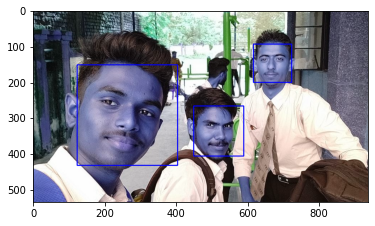

In [5]:
plt.imshow(face_img)
plt.show()

## Face Detection in a Video

In [6]:
# Video Using WebCam
cap = cv2.VideoCapture(0)
# Loading Video from System
# cap = cv2.VideoCapture(file-name)

while True:
    ret, face_img = cap.read()      # Reading Video Frame par Frame
    gray_faces = cv2.cvtColor(face_img,cv2.COLOR_BGR2GRAY)       #Converting image into Gray Scale
    faces=face_learner.detectMultiScale(gray_faces,scaleFactor=1.1,minNeighbors=5)      # KNN to learning
    for (x, y, w, h) in faces:  
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 0, 0), 2)    # Recatangle around the faces
#         print(x,", ",y)
    cv2.imshow("frame",face_img)     # Printing Frame by Frame
    if cv2.waitKey(1) == ord('q'):   # Quit WebCam video
        break
        
cap.release()                        # Release WebCam resourses
cv2.destroyAllWindows()              # Closing all windows



# IDENTIFYING FACES from a Video

## Loading Different Libraries

In [7]:
import face_recognition as fr
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## Setting Path to Images -- 

In [8]:
# Images Used in Project -- Path
BASE_DIR = os.path.dirname(os.path.abspath(" "))
image_dir = os.path.join(BASE_DIR, "Image")


### Empty List for Images and Names

In [9]:
# Empty List for Images and Names

images = []
names = []

myList = os.listdir(image_dir)
# myList

### Appending Names and Images in different List

In [10]:
# Appending Names and Images in different List

for cl in myList:
    cur_img = cv2.imread(f'{image_dir}/{cl}')
    images.append(cur_img)
    names.append(os.path.splitext(cl)[0])          ## Accessing name of image without extention
    
# names

### Creating a function to ENCODING images and Appending into a list

In [11]:
def encoding_img(images):
#     print(len(images))
    encoding_list = []
    for img in images:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)       
        encoding_list.append(fr.face_encodings(img))
#         print("Found")
    new_list=list(encoding_list)                       ## Type casting into List
    return new_list                                    ## Returning encoded list

In [12]:
encode_list_known_faces = encoding_img(images)       ## All encoded faces list
type(encode_list_known_faces)

list

In [ ]:
# Capturing Video using webCam
cap = cv2.VideoCapture(0)
 
while True:
    success, img = cap.read()     ## Reading Video frame per frame

    imgS = cv2.resize(img,(0,0),None,0.25,0.25)   ## Resizing frame
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)  ## Gray Scale Image

    facesCurFrame = fr.face_locations(imgS)       ## Faces Loaction in Image
    encodesCurFrame = fr.face_encodings(imgS,facesCurFrame) ## Encoding faces and image
    
    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        matches = fr.compare_faces(encode_list_known_faces[1],encodeFace)
        faceDis = fr.face_distance(encode_list_known_faces[1],encodeFace)
        faceDis1 = fr.face_distance(encode_list_known_faces[2],encodeFace)
        faceDis2 = fr.face_distance(encode_list_known_faces[3],encodeFace)
        faceDis3 = fr.face_distance(encode_list_known_faces[4],encodeFace)
        faceDis4 = fr.face_distance(encode_list_known_faces[5],encodeFace)

#         accessing most nearest image

        lst=[faceDis,faceDis1,faceDis2,faceDis3,faceDis4]
        matchIndex = min(lst)
        
        min_index = lst.index(matchIndex)
        
        name = names[min_index+1].upper()
        #print(name)                                       -------Printing Name on face---------
        y1,x2,y2,x1 = faceLoc
        y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,255),2)
        cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
        cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)

    cv2.imshow("WebCam",img)
#     plt.imshow(img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    